In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')
plt.rcParams.update({'font.size':16,'font.family':'serif'})

In [20]:
loan_df = pd.read_csv('data/loans.csv')
loan_df_bad = loan_df[loan_df['amount_funded_by_investors'] > 0]

$H_{0}$ = The mean interest for 5 year loans is the same as 3 year loans


$H_{A}$ = The mean interest for 5 year loans is different than 3 year loans


Lets let $\alpha$ be $0.05$

In [21]:
interest_rate_5yrs = loan_df[loan_df['loan_length'] > 40]
interest_rate_5yrs = interest_rate_5yrs['interest_rate'].to_numpy()

interest_rate_3yrs = loan_df[loan_df['loan_length'] < 40]
interest_rate_3yrs = interest_rate_3yrs['interest_rate'].to_numpy()

In [22]:
def summarize(year, data):
    print(f'For {year} year loans: \nmean: {data.mean()}\nstd: {data.std()}\nvar: {data.std()**2}')

In [23]:
summarize('5', interest_rate_5yrs)

For 5 year loans: 
mean: 16.407463503649634
std: 4.123445598365839
var: 17.00280360268261


In [24]:
summarize('3', interest_rate_3yrs)

For 3 year loans: 
mean: 12.132558974358977
std: 3.68307412922871
var: 13.56503504139382


Since the variance is similiar, we can use a normal independent t test!

In [33]:
stat, p_val = stats.ttest_ind(interest_rate_5yrs, interest_rate_3yrs, equal_var=True, alternative='greater')
print(f'T-Statistic: {stat}\nP-Value: {p_val}')

T-Statistic: 23.356325866514194
P-Value: 1.3773036198451968e-109


We can reject the null hypo thesis! Lets try a mann-whitney U test too!

In [34]:
stat, p_val = stats.mannwhitneyu(interest_rate_5yrs, interest_rate_3yrs, alternative='greater')
print(f'U-Statistic: {stat}\nP-Value: {p_val}')

U-Statistic: 824077.5
P-Value: 2.1513163003281396e-84


Cool! Still can reject!!

Next, lets visually verify the results by plotting

In [35]:
def create_t(data):
    return stats.t(data)
def create_normal (data):
    std = data.std()
    ste = std / len(data)**.5
    mean = data.mean()
    return stats.norm(loc = mean, scale = ste)

In [36]:
interest_rate_3yrs_norm = create_normal(interest_rate_3yrs)
interest_rate_5yrs_norm = create_normal(interest_rate_5yrs)

In [41]:
def make_testing_plot(dist1label, dist1, dist2label, dist2, ax):
    lower = dist1.ppf(.001) if dist1.ppf(.001) < dist2.ppf(.001) else dist2.ppf(.001)
    upper = dist1.ppf(.999) if dist1.ppf(.999) > dist2.ppf(.999) else dist2.ppf(.999)
    t = np.linspace(lower, upper, num=2500)
    ax.plot(t, dist1.pdf(t), label= dist1label, color='red')
    ax.plot(t, dist2.pdf(t), label= dist2label, color='blue')    
    ax.set_title('Interest Rate Distribution For Loans'.format(dist1label, dist2label))
    ax.set_xlabel('Interest Rate')
    ax.set_ylabel('Probability')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(colors='black')
    ax.legend()
    plt.savefig('images/HypoTesting.png',dpi=300)

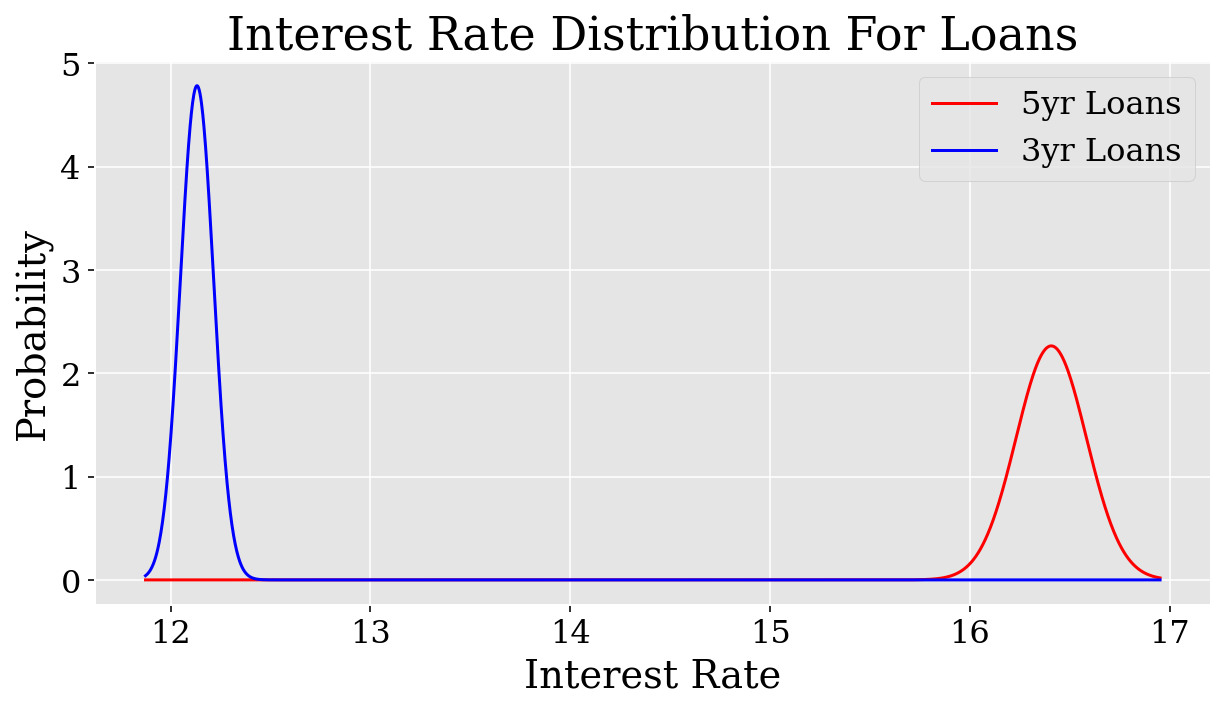

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
make_testing_plot("5yr Loans", interest_rate_5yrs_norm,"3yr Loans", interest_rate_3yrs_norm, ax)